In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from bivariate_copula import *

In [ ]:
sns.set()

params = {
    'font.size': 14,
    'figure.figsize': (13, 5),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

## Clayton copula

* $\theta \to 0$ : indenpendant coupling,
* $\theta \to +\infty$ : full dependance coupling,


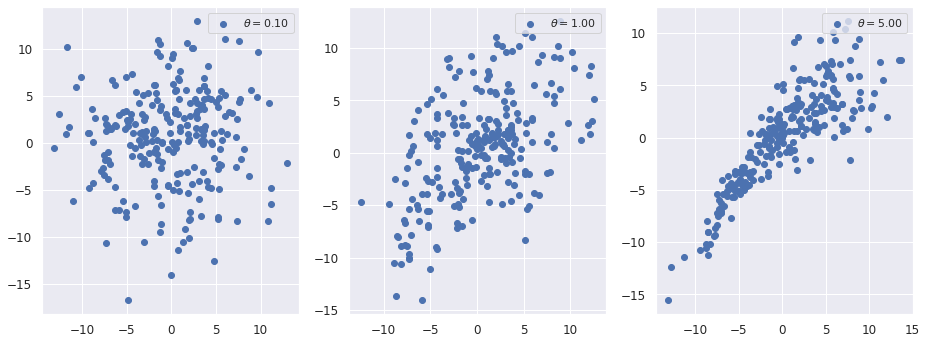

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3)

X = np.random.normal(0, 5, size=500)
Y = np.random.normal(0, 5, size=500)
copula = ClaytonCopula(X, Y)

thetas = [0.1, 1.0, 5.0]
n_sim = 250

for i, ax in enumerate(axes):
    theta = thetas[i]
    copula.theta = theta
    X_sim, Y_sim = copula.simulate(n_sim)
    ax.scatter(X_sim, Y_sim, label=r'$\theta=${:.2f}'.format(theta))
    ax.legend(loc='upper right')

plt.tight_layout()

plt.show()